<a href="https://colab.research.google.com/github/roger041/docker-react/blob/master/temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow-gpu==2.3.0



     |████████████████████████████████| 320.4MB 39kB/s 


In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
temp_df = pd.read_csv('cf.csv')

# New Section

# New Section

# New Section

In [6]:
temp_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [7]:
temp_df.head(4)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0


In [8]:
temp_df.tail(5)

,Celsius,Fahrenheit
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [9]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [10]:
temp_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


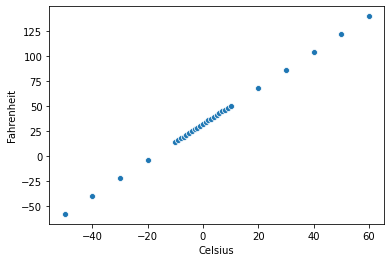

In [12]:
sns.scatterplot(temp_df['Celsius'], temp_df['Fahrenheit'])

In [13]:
X_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

In [14]:
X_train.shape

(30,)

In [15]:
y_train.shape

(30,)

In [17]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.9), loss = 'mean_squared_error')

In [40]:
epochs_hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 1.8020
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 407.3155
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 27.3612
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 85.4339
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 232.4920
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 177.0248
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 51.9053
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 1.6196
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 49.9208
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 110.1897
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 107.5601
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 54.5583
Epoch 13/100
1/1 [============================

In [41]:
epochs_hist.history.keys()

dict_keys(['loss'])

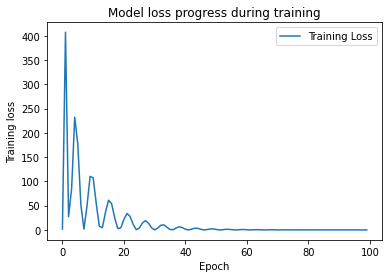

In [42]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training Loss'])


In [43]:
model.get_weights()

[array([[1.8042556]], dtype=float32), array([32.014324], dtype=float32)]

In [44]:
Temp_C=100
Temp_F = model.predict([Temp_C])
print("Temperature in degF of Trained ANN :",Temp_F )

Temperature in degF of Trained ANN : [[212.4399]]


In [45]:
Temp_F = (9/5) * Temp_C + 32
print('temperature in DegF using equation : ', Temp_F)

temperature in DegF using equation :  212.0
